In [1]:
import urllib
from bs4 import BeautifulSoup
import dill as pickle
import sys
%matplotlib inline
sys.setrecursionlimit(100000)

In [2]:
#website = "nips2017"
website = "nips2019"
#website = "icml2017"

In [3]:
if True:
    if website=='nips2017':
        url = "https://nips.cc/Conferences/2017/AcceptedPapersInitial"
    elif website=='icml2017':
        url = "https://2017.icml.cc/Conferences/2017/AcceptedPapers"
    elif website=='nips2019':
        url = "https://nips.cc/Conferences/2019/AcceptedPapersInitial"
    html = urllib.request.urlopen(url)
    soup = BeautifulSoup(html, "lxml")
    with open(website+'.pickle', mode='wb') as f:
        pickle.dump(soup, f)
else:
    with open(website+'.pickle', mode='rb') as f:
        soup = pickle.load(f)

In [67]:
if website=='nips2017' or website=='nips2019':
    titles = soup.find_all('b')
elif website=='icml2017':
    titles = soup.find_all('strong')
else:
    NotImplementedError()
nb_tot_papers = len(titles) - 3
titles

[<b>NeurIPS <span>| 2019 </span></b>,
 <b>   Calls 2019</b>,
 <b>   Author Resources</b>,
 <b>Multimodal Model-Agnostic Meta-Learning via Task-Aware Modulation</b>,
 <b>ViLBERT: Pretraining Task-Agnostic Visiolinguistic Representations for Vision-and-Language Tasks</b>,
 <b>Stochastic Shared Embeddings: Data-driven Regularization of Embedding Layers</b>,
 <b>Unsupervised Scale-consistent Depth and Ego-motion Learning from Monocular Video</b>,
 <b>Zero-shot Learning via Simultaneous Generating and Learning</b>,
 <b>Ask not what AI can do for you, but what AI should do: Towards a framework of task delegability</b>,
 <b>Stand-Alone Self-Attention in Vision Models</b>,
 <b>High Fidelity Video Prediction with Large Neural Nets</b>,
 <b>Unsupervised learning of object structure and dynamics from videos</b>,
 <b>TensorPipe: Easy Scaling with Micro-Batch Pipeline Parallelism</b>,
 <b>Meta-Learning with Implicit Gradients</b>,
 <b>Adversarial Examples Are Not Bugs, They Are Features</b>,
 <b>So

In [68]:
print(nb_tot_papers)

1429


In [69]:
import re

#pattern = r'\([\w\s]+\)'
pattern = r'\([\w\s\W]+\)'
if website=='nips2017' or website=='nips2019':
    authors = soup.find_all('i')
elif website=='icml2017':
    authors = soup.find_all('em')
    
institutes = []
institutes_in_paper = []
for author in authors:
    for content in author.contents:
        items = re.findall(pattern, content)
        print(items)
        [institutes.append(item[1:-1].lower()) for item in items]
        institutes_in_paper.append(items)
#institutes = set(sum(institutes, []))
#institutes = set(institutes)
institutes.sort()
#institutes

['(University of Michigan) · Shao-Hua Sun (University of Southern California) · Hexiang Hu (University of Southern California) · Joseph J Lim (University of Southern California)']
['(Georgia Tech) · Dhruv Batra (Georgia Tech / Facebook AI Research (FAIR)) · Devi Parikh (Georgia Tech / Facebook AI Research (FAIR)) · Stefan Lee (Georgia Institute of Technology)']
['(University of California, Davis) · Shuqing Li (University of California, Davis) · Cho-Jui Hsieh (UCLA) · James Sharpnack (UC Davis)']
['(The University of Adelaide) · Zhichao Li (Tusimple) · Naiyan Wang (Hong Kong University of Science and Technology) · Huangying Zhan (The University of Adelaide) · Chunhua Shen (University of Adelaide) · Ming-Ming Cheng (Nankai University) · Ian Reid (University of Adelaide)']
['(Seoul National University) · Beomhee Lee (Seoul National University)']
['(University of Colorado Boulder) · Chenhao Tan (University of Colorado Boulder)']
['(Google) · Prajit Ramachandran (Google Brain) · Ashish Vasw

In [91]:
pattern = r'\([\w\s\W]+\)'
#pattern = r'\([.*]\)'

repatter = re.compile(pattern)
repatter.findall('(Preferred Networks, Inc.)'),repatter.findall('(Preferred Networks)'),repatter.findall('(Preferred Networks, Inc., Inc.)')

(['(Preferred Networks, Inc.)'],
 ['(Preferred Networks)'],
 ['(Preferred Networks, Inc., Inc.)'])

In [71]:
print(set(institutes))

{'carnegie mellon university) · travis dick (carnegie mellon university) · ritesh noothigattu (carnegie mellon university) · ariel d procaccia (carnegie mellon university', 'indiana university) · lei jiang (indiana university bloomington', 'university of bergen) · robert ganian (tu wien) · iyad kanj (depaul university, chicago) · stefan szeider (vienna university of technology', 'simon fraser university) · zhijian liu (mit) · song han (mit', 'zhejiang university) · yang wang (huazhong university of science and technology) · zheng yang (fabu) · deng cai (zju', 'gipsa lab) · romain couillet (centralsupélec) · nicolas tremblay (cnrs', 'yale university) · ehsan kazemi (yale) · moran feldman (open university of israel) · andreas krause (eth zurich) · amin karbasi (yale', 'the university of sydney) · jingwei zhang (hong kong university of science and technology & university of sydney) · dacheng tao (university of sydney', 'cornell university) · felix wu (cornell university) · kilian weinberg

In [72]:
len(list(set(institutes)))

1397

In [73]:
for f in list(set(institutes)):
    print(f)

carnegie mellon university) · travis dick (carnegie mellon university) · ritesh noothigattu (carnegie mellon university) · ariel d procaccia (carnegie mellon university
indiana university) · lei jiang (indiana university bloomington
university of bergen) · robert ganian (tu wien) · iyad kanj (depaul university, chicago) · stefan szeider (vienna university of technology
simon fraser university) · zhijian liu (mit) · song han (mit
zhejiang university) · yang wang (huazhong university of science and technology) · zheng yang (fabu) · deng cai (zju
gipsa lab) · romain couillet (centralsupélec) · nicolas tremblay (cnrs
yale university) · ehsan kazemi (yale) · moran feldman (open university of israel) · andreas krause (eth zurich) · amin karbasi (yale
the university of sydney) · jingwei zhang (hong kong university of science and technology & university of sydney) · dacheng tao (university of sydney
cornell university) · felix wu (cornell university) · kilian weinberger (cornell university) · 

eth zurich and university of zurich) · yuxin chen (caltech) · oisin mac aodha (california institute of technology) · manuel gomez rodriguez (max planck institute for software systems) · andreas krause (eth zurich) · pietro perona (california institute of technology) · yisong yue (caltech) · adish singla (mpi-sws
institut de physique théorique, paris) · madhu advani (harvard university) · andrew saxe (university of oxford) · florent krzakala (école normale supérieure) · lenka zdeborová (cea saclay
university of rouen) · maxime berar (université de rouen) · gilles gasso (litis - insa de rouen) · alain rakotomamonjy (université de rouen normandie   criteo ai lab
northwestern university) · qi cai (northwestern university) · zhuoran yang (princeton university) · zhaoran wang (northwestern university
university college london) · neil burgess (university college london
princeton university) · wenda zhou (columbia university) · farhan damani (princeton university) · abigail doyle (princeton un

In [74]:
print(nb_tot_papers)

1429


In [75]:
from collections import Counter

counter = Counter(institutes)
for word, cnt in counter.most_common():
    print(word, cnt)

purdue university) · jean honorio (purdue university 3
google 3
eth zurich) · aurelien lucchi (eth zurich 2
gatsby unit, ucl) · maneesh sahani (gatsby unit, ucl 2
university of amsterdam) · max welling (university of amsterdam / qualcomm ai research 2
university of toronto 2
uc berkeley) · stephen tu (uc berkeley) · benjamin recht (uc berkeley 2
epfl) · soroosh shafieezadeh abadeh (epfl) · man-chung yue (the hong kong polytechnic university) · daniel kuhn (epfl) · wolfram wiesemann (imperial college 2
penn state university) · jordan awan (penn state university 2
carnegie mellon university) · chun kai ling (carnegie mellon university) · fei fang (carnegie mellon university) · tuomas sandholm (carnegie mellon university 2
ucla) · quanquan gu (ucla 2
duke university) · jon schneider (google research) · balasubramanian sivan (google research 2
deepmind) · andrás györgy (deepmind) · csaba szepesvari (deepmind/university of alberta 2
amazon 2
university of texas at austin) · hsiang-fu yu (am

mcgill university / facebook ai research) · joshua romoff (mcgill university) · nicolas ballas (facebook fair) · joelle pineau (facebook) · mike rabbat (facebook fair 1
aalto university) · mustafa mert çelikok (aalto university) · pedram daee (aalto university) · samuel kaski (aalto university 1
microsoft research) · yuanzhi li (princeton) · yingyu liang (university of wisconsin madison 1
sorbonne université) · aymeric dieuleveut (epfl) · martin jaggi (epfl 1
seoul national university) · minyong cho (seoul national university) · taebum kim (seoul national university) · u kang (seoul national university 1
johns hopkins university) · teodor vanislavov marinov (johns hopkins university) · mehryar mohri (courant inst. of math. sciences & google research 1
university of washington) · kevin jamieson (u washington 1
preferred networks, inc.) · takuya inoue (university of tokyo) · gentaro watanabe (preferred networks, inc.) · takuya akiba (preferred networks, inc.) · masanori koyama (preferred

pennsylvania state university) · mohammad mahdi kamani (pennsylvania state university) · mehrdad mahdavi (pennsylvania state university) · viveck cadambe (penn state 1
carnegie mellon university) · scott linderman (stanford university) · kyle miller (carnegie mellon university) · artur dubrawski (carnegie mellon university 1
technische universität berlin) · michael gastegger (tu berlin) · kristof schütt (tu berlin 1
university of oxford) · jianan wang (deepmind) · ronald clark (imperial college london) · qingyong hu (university of oxford) · sen wang (heriot-watt university) · andrew markham (university of oxford) · niki trigoni (university of oxford 1
technion) · nadav merlis (technion) · mohammad ghavamzadeh (facebook ai research) · shie mannor (technion 1
university of toronto) · saminul haque (university of toronto) · cem anil (university of toronto; vector institute) · james lucas (university of toronto) · roger grosse (university of toronto) · joern-henrik jacobsen (vector institu

experts league ltd.) · vasilii ershov (yandex) · igor labutin (saint petersburg campus of national research university higher school of economics 1
carnegie mellon university) · bhiksha raj (carnegie mellon university) · rita singh (carnegie mellon university 1
the university of texas at austin) · keyi wu (the university of texas at austin) · joshua chen (the university of texas at austin) · tom o'leary-roseberry (the university of texas at austin) · omar ghattas (the university of texas at austin 1
stanford university) · dan boneh (stanford university 1
ecole polytechnique fédérale de lausanne) · mireille el gheche (epfl) · giovanni chierchia (esiee paris) · pascal frossard (epfl 1
university of cambridge) · jonathan gordon (university of cambridge) · eric nalisnick (university of cambridge) · josé miguel hernández-lobato (university of cambridge 1
city university of hong kong) · huiling zhen (ku leuven) · zhenhua li (national university of singapore) · qing-fu zhang () · sam kwong (c

idiap research institute & epfl) · françois fleuret (idiap research institute 1
samsung ai center, moscow) · evgenii egorov (skolkovo institute of science and technology) · dmitry vetrov (higher school of economics, samsung ai center, moscow 1
tsinghua university) · shunsuke saito (university of southern california) · weikai chen (usc institute for creative technology) · hao li (pinscreen/university of southern california/usc ict 1


In [76]:
def count_paper(institute_names, institutes_in_paper):
    nb_papers = {}
    [nb_papers.update({key:0}) for key, value in institute_names.items()]

    for key, value in institute_names.items():
        for paper in institutes_in_paper:
            try:
                for institute in paper:
                    
                    found = False
                    
                    for v in value:
                        found = found or re.search(v, institute.lower()) 
#                        found = found or v in institute.lower()

                    if found:
                        nb_papers[key] += 1
                        raise Exception
                
            except Exception:
                pass
    return sorted(nb_papers.items(), key=lambda x: x[1], reverse=True)

In [77]:
institute_names = {}
[institute_names.update({word:[word]}) for word, cnt in counter.most_common()]

#institute_names[u'carnegie mellon university'] += institute_names[u'cmu']
#institute_names[u'adobe research'] += institute_names[u'adobe research']
#del institute_names[u'cmu']
#del institute_names[u'adobe research']
#institute_names

count_paper(institute_names, institutes_in_paper)

[('google', 143),
 ('mit', 113),
 ('stanford university', 76),
 ('microsoft research', 66),
 ('uc berkeley', 52),
 ('columbia university', 42),
 ('tsinghua university', 35),
 ('facebook ai research', 32),
 ('nyu', 29),
 ('university of toronto', 27),
 ('amazon', 22),
 ('riken', 20),
 ('harvard university', 20),
 ('university of cambridge', 18),
 ('new york university', 16),
 ('vector institute', 11),
 ('university of chicago', 7),
 ('ntt', 7),
 ('university of massachusetts, amherst', 6),
 ('institute of automation, chinese academy of sciences', 6),
 ('national institute of advanced industrial science and technology', 4),
 ('nec corporation,      university of tokyo', 3),
 ('leiden university', 3),
 ('netflix', 2),
 ('ben-gurion university of the negev', 2),
 ('rochester institute of technology', 2),
 ('osaka university', 2),
 ('universidad de chile', 1),
 ('laboratoire de mathematiques d’orsay, univ. paris-sud,', 1),
 ('florida state university', 1),
 ('wuhan university', 1),
 ('depar

In [78]:
institute_names = {
    "Carnegie Mellon University":["carnegie mellon university", "cmu"],
    "Google":["google", "deepmind", "google deepmind", "google brain", "google research"],
    "MIT":["mit", "massachusetts institute of technology"],
    "Microsoft":["microsoft research"],
    "Stanford":["stanford"],
    "UC Berkeley":["uc berkeley", "ucb"],
    "Oxford":['oxford'],
}

nb_papers = count_paper(institute_names, institutes_in_paper)
nb_papers

[('Google', 165),
 ('MIT', 118),
 ('Stanford', 81),
 ('Carnegie Mellon University', 81),
 ('Microsoft', 66),
 ('UC Berkeley', 52),
 ('Oxford', 41)]

In [79]:
institute_names = {
    "JPN":['tokyo','waseda','hokkaido','osaka','nankai','nec','ntt','riken', 'preferred', 'keio', 'aist', 'toyota', 'mitsubishi', 'yahoo', 'kyoto', 'pfn', 'institute of statistical mathematics'],
    "Carnegie Mellon University":["carnegie mellon university", "cmu"],
    "Google":["google", "deepmind"],
    "Stanford":["stanford", "stanford university"],
    "MIT":["mit", "massachusetts institute of technology"],
    "UC Berkeley":["uc berkeley", "ucb"],
    "Microsoft":["microsoft"],
    "Duke University":["duke"],
    "Oxford":['oxford'],
    "Princeton University":['princeton'],
    "ETH Zurich":['eth', 'zurich'],
    "University of Michigan":['michigan'],
    "Columbia Michigan":['columbia'],
    "University of Cambridge":['cambridge'],
    "Harvard University":['harvard'],
    "EPFL":['epfl'],
    "INRIA":['inria'],
    "Georgia Tech":['georgia'],
    "Tsinghua University":['tsinghua'],
    "UCL":['ucl'],
    "University of Toronto":['toronto'],
    "facebook":['facebook'],
    "UIUC":['uiuc'],
    "University of Texas":['texas'],
    "University of Minnesota":['minnesota'],
    "Peking University":['peking'],
    "NVIDIA":['nvidia'],
    "UBER":['uber'],
    "twitter":['twitter'],
    "Amazon":['amazon'],
}
nb_papers = count_paper(institute_names, institutes_in_paper)
nb_papers

[('Google', 165),
 ('MIT', 118),
 ('Carnegie Mellon University', 81),
 ('Stanford', 81),
 ('Microsoft', 73),
 ('JPN', 54),
 ('UC Berkeley', 52),
 ('Princeton University', 51),
 ('Columbia Michigan', 48),
 ('ETH Zurich', 46),
 ('Oxford', 41),
 ('facebook', 39),
 ('Tsinghua University', 37),
 ('UCL', 37),
 ('INRIA', 36),
 ('University of Texas', 36),
 ('Georgia Tech', 31),
 ('University of Toronto', 27),
 ('Peking University', 27),
 ('EPFL', 25),
 ('Harvard University', 23),
 ('University of Cambridge', 23),
 ('Duke University', 22),
 ('Amazon', 22),
 ('UBER', 16),
 ('University of Michigan', 14),
 ('UIUC', 11),
 ('University of Minnesota', 10),
 ('NVIDIA', 9),
 ('twitter', 2)]

In [80]:
institute_names_jpn = {}
for f in institute_names['JPN']:
    institute_names_jpn.update({f:[f]})

count_paper(institute_names_jpn, institutes_in_paper)

[('riken', 20),
 ('tokyo', 16),
 ('nec', 9),
 ('ntt', 7),
 ('kyoto', 7),
 ('aist', 7),
 ('toyota', 5),
 ('preferred', 4),
 ('institute of statistical mathematics', 2),
 ('keio', 2),
 ('osaka', 2),
 ('nankai', 1),
 ('yahoo', 1),
 ('mitsubishi', 1),
 ('pfn', 0),
 ('hokkaido', 0),
 ('waseda', 0)]

In [81]:
count_paper({'Preferred Networks':['preferred']}, institutes_in_paper)

[('Preferred Networks', 4)]

In [82]:
import numpy as np
nb_papers.append(('rest',nb_tot_papers-np.array([i[1] for i in nb_papers]).sum()))

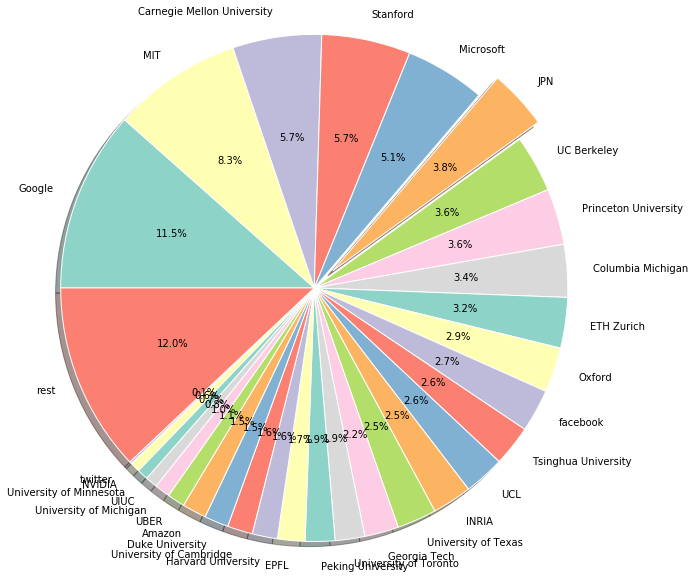

In [83]:
import matplotlib.pyplot as plt
import seaborn
from matplotlib import cm
cs=cm.Set3(np.arange(9))

plt.figure(figsize=(10,10))
 
# Data to plot
labels = [i[0] for i in nb_papers]
sizes = [i[1] for i in nb_papers]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = [0]*len(nb_papers)

for i,x in enumerate(nb_papers):
    if x[0]=='Google' or x[0]=='Google' or x[0]=='Carnegie Mellon University' or x[0]=='MIT' or x[0]=='Microsoft' or x[0]=='Stanford' or x[0]=='UCBerkeley':
        explode[i]=0.
    if x[0]=='JPN':
        explode[i]=0.1
 
plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=cs,
    startangle=180,
    counterclock=False, 
    wedgeprops={'linewidth': 1, 'edgecolor':"white"},
    autopct='%1.1f%%',
    shadow=True
)

plt.axis('equal')
#plt.title('NIPS 2019 paper')
plt.savefig(website+'.png')
plt.show()

In [84]:
institute_names = {
    "UCLA":['ucla'],
    "IBM":['ibm'],
    "Adobe":['adobe'],
    "Intel":['intel'],
    "Nvidia":['nvidia'],
    "OpenAI":['openai'],
    "Amazon":['amazon'],
    "Max Planck Institute":['planck'],
    "NTT":['ntt'],
    "NEC":['nec'],
    "TTIC":['toyota technological institute at chicago'],
    "Uber":['uber'],
    "Riken":['riken'],
    "Twitter":['twitter'],
    "Apple":['apple'],
    "JPN University":['tokyo','waseda','hokkaido','osaka','nankai', ' tokyo metropolitan university'],
}

count_paper(institute_names, institutes_in_paper)

[('Intel', 41),
 ('IBM', 36),
 ('UCLA', 27),
 ('Amazon', 22),
 ('Riken', 20),
 ('JPN University', 18),
 ('Uber', 16),
 ('Max Planck Institute', 14),
 ('Nvidia', 9),
 ('NEC', 9),
 ('NTT', 7),
 ('Adobe', 6),
 ('Apple', 3),
 ('OpenAI', 3),
 ('TTIC', 3),
 ('Twitter', 2)]